# STUDENT PERFORMANCE INDICATOR

### Life cycle of a Machine Learning Project

- Understanding of the Problem Statement
- Data Collection
- Data checks to perform
- Exploratory Data Analysis
- Data pre-processing
- Model Training
- Choose best model

### 1) Problem Statement

- This project understands how the students' performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test preparation course. 

### 2) Data Collection

- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- This data consists of 1000 rows and 8 columns

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import CSV Data as Pandas DataFrame

In [44]:
data = pd.read_csv('data/stud.csv')

##### Showing top 5 records

In [45]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of dataset

In [46]:
data.shape

(1000, 8)

#### 2.2 Dataset Information

- gender: sex of students - Male/Female
- race/ethinicity: ethinicity of students - Group A/B/C
- parental level of education: parents' final education - bachelor's degrees, some college, master's degree, associate's degree, high school
- lunch: having lunch before test - standard or free/reduced
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score

### 3) Data checks to perform

- Check missing values
- Check duplicates
- Check datatypes
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical colum

#### 3.1 Check missing values

In [47]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### There are no duplicates in the dataset

#### 3.2 Check duplicates

In [48]:
data.duplicated().sum()

0

##### There are no duplicate values present in the dataset

#### 3.3 Check data types

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Check the number of unique values of each column

In [50]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of dataset

In [51]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights

- From above description of numerical data, all means are very close to each other - between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher i.e 10 and for reading it is 17

#### 3.6 Exploring Data

In [52]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
print("Categories in 'gender' variable: ", end=" ")
print(data['gender'].unique())

print("Categories in 'race ethinicity' variable: ", end=" ")
print(data['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(data['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")
print(data['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race ethinicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [54]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [55]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.7 Adding columns for Total Score and Average

In [56]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = round(data['total_score']/3, 2)
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [57]:
math_full = data[data['math_score'] == 100]['average'].count()
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [58]:
math_less_than_20 = data[data['math_score'] <= 20]['average'].count()
reading_less_than_20 = data[data['reading_score'] <= 20]['average'].count()
writing_less_than_20 = data[data['writing_score'] <= 20]['average'].count()

print(f'Number of students with full marks in Maths: {math_less_than_20}')
print(f'Number of students with full marks in Writing: {writing_less_than_20}')
print(f'Number of students with full marks in Reading: {reading_less_than_20}')

Number of students with full marks in Maths: 4
Number of students with full marks in Writing: 3
Number of students with full marks in Reading: 1


##### Insights
- From the above values we conclue that performance is worst in Maths
- Best performance is in reading section

### 4) Exploring Data - Visualisation

#### 4.1 Visualize average score distribution to make some conclusion

- Histogram
- Kernel Distribution Function(KDE)

#### 4.1.1 Histogram and KDE

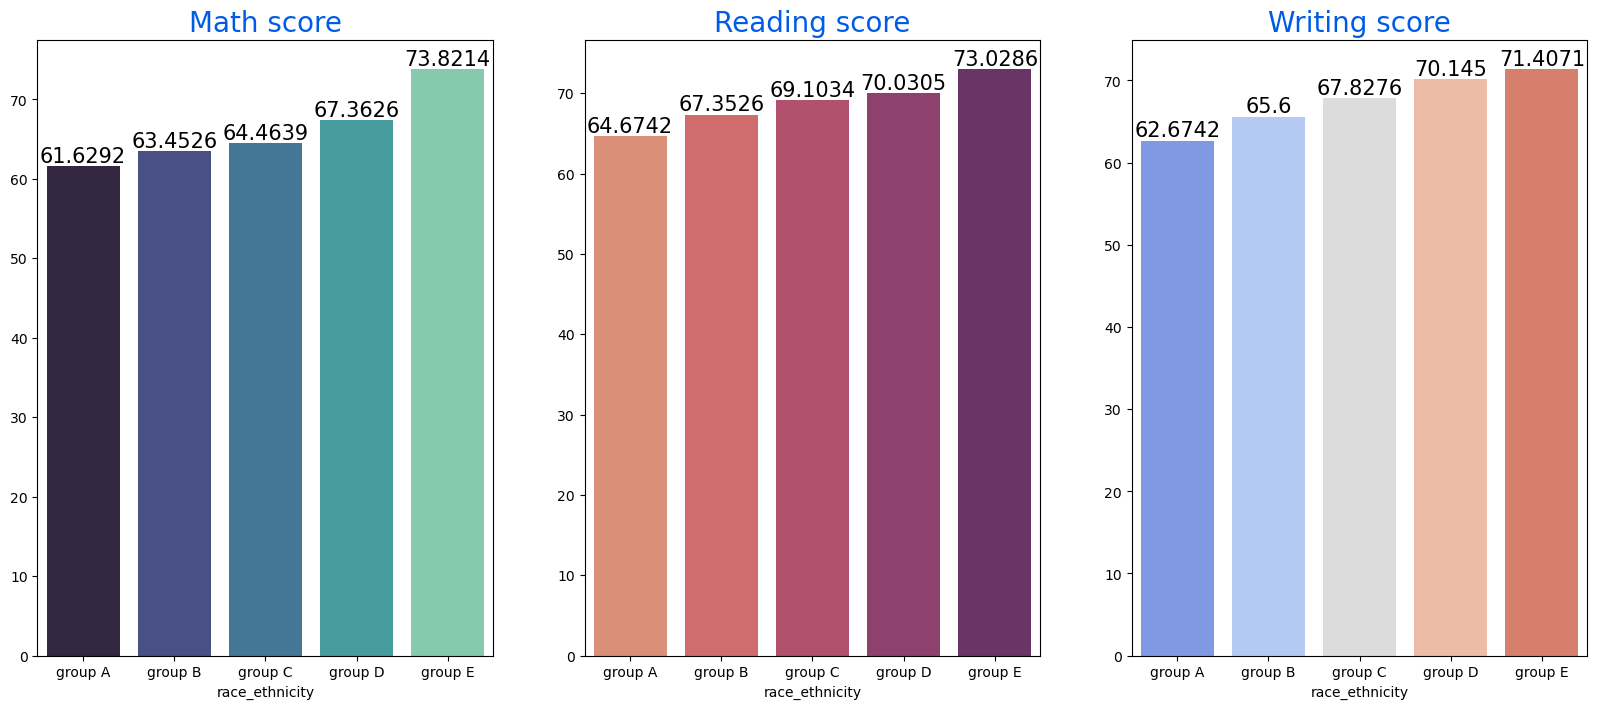

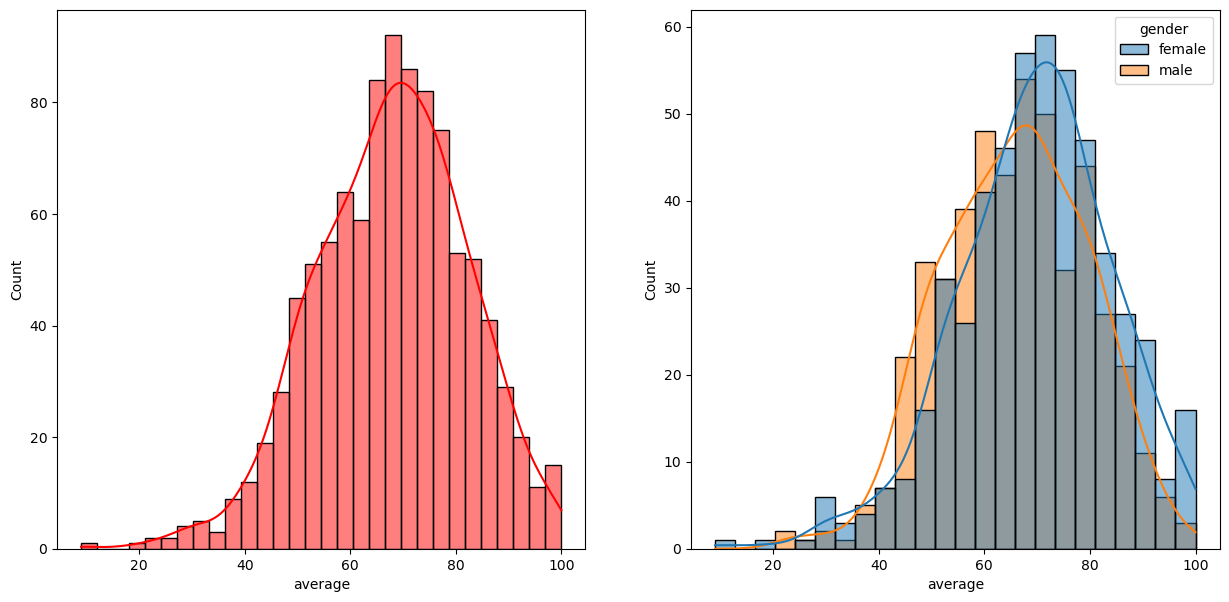

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='average', bins=30, kde=True, color='red')
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='average', kde=True, hue='gender')
plt.show()

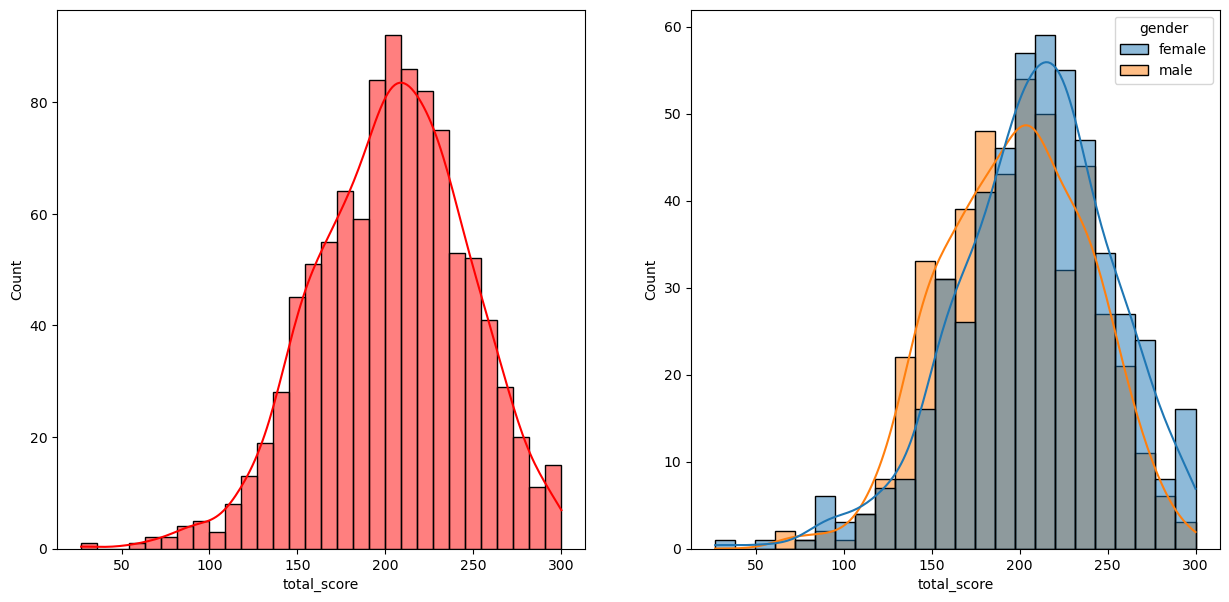

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='red')
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='total_score', kde=True, hue='gender')
plt.show()

##### Insights
- Female students tend to perform well as compared to male students

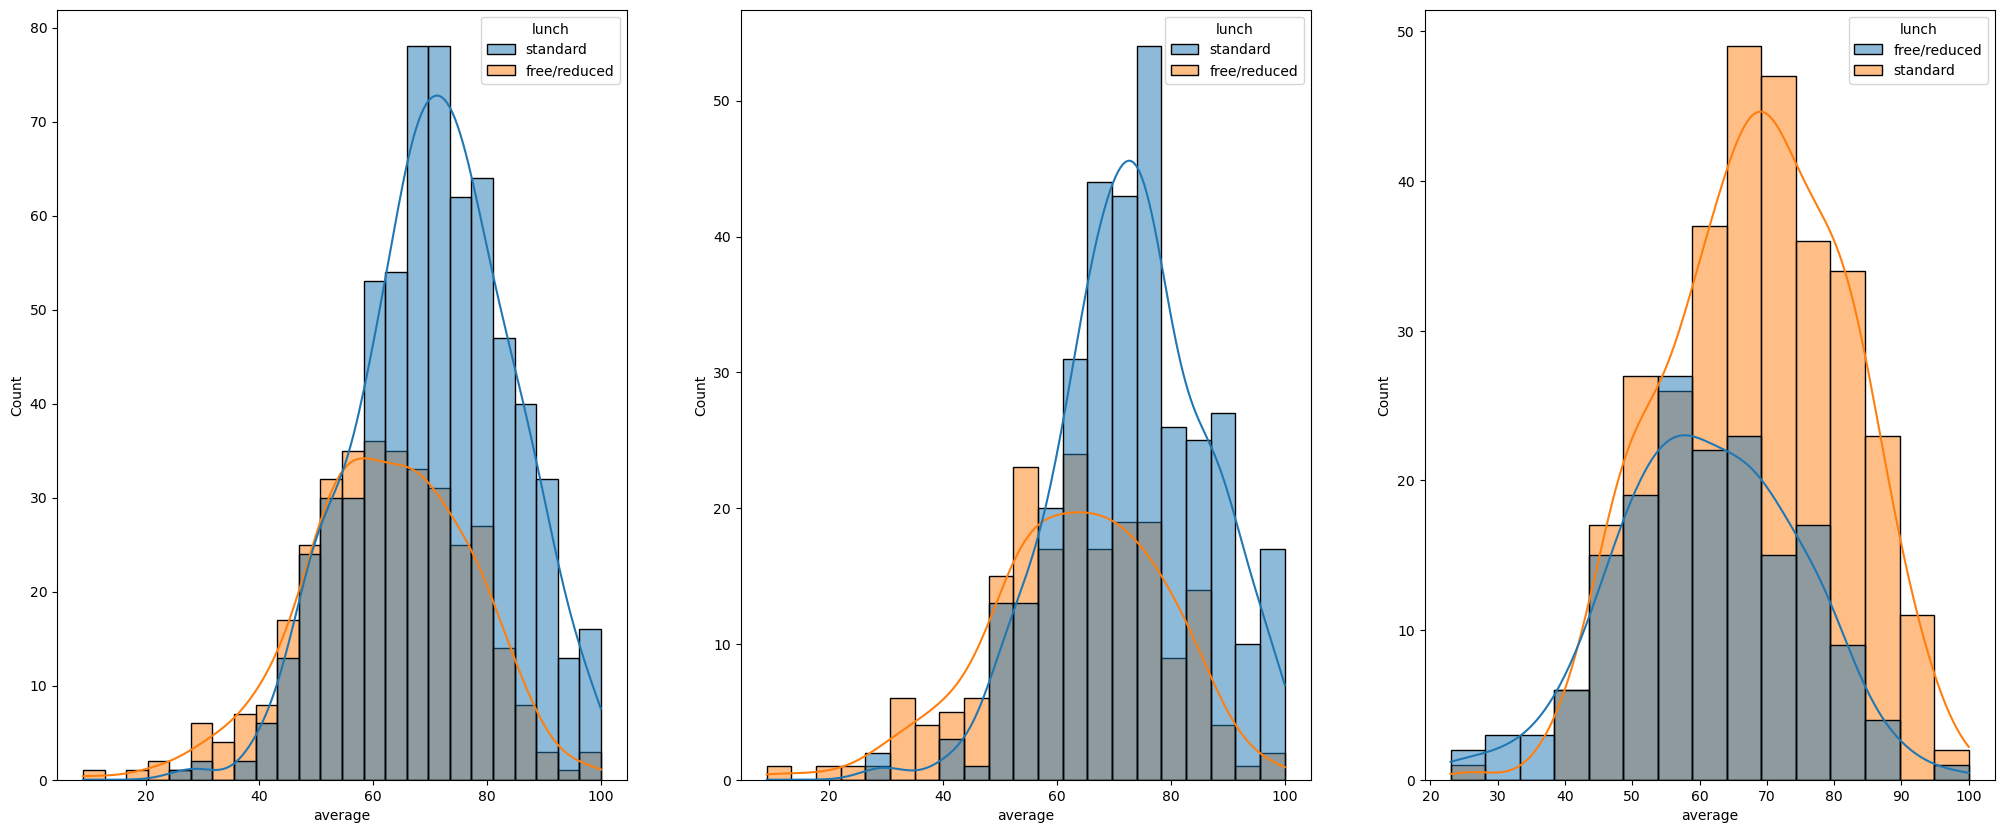

In [61]:
plt.subplots(1, 3, figsize=(25,10))
plt.subplot(1, 3, 1)
sns.histplot(data=data, x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data['gender']=='male'], x='average', kde=True, hue='lunch')
plt.show()

##### Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it a male or a female

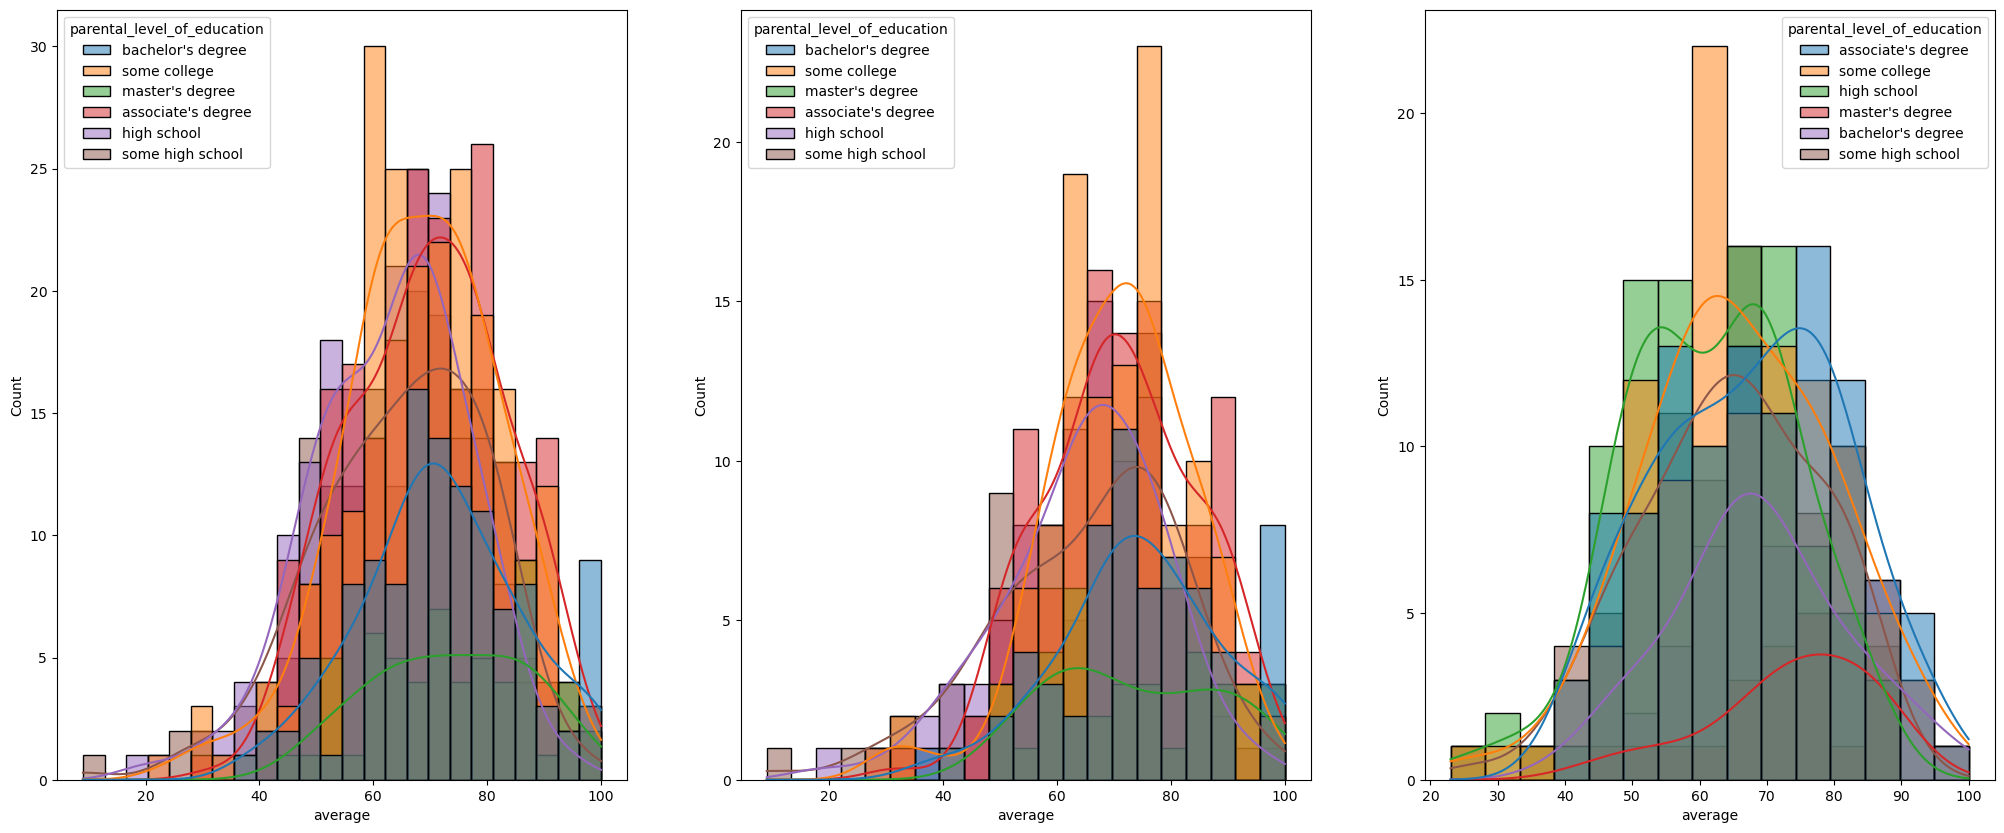

In [62]:
plt.subplots(1, 3, figsize=(25,10))
plt.subplot(131)
sns.histplot(data=data, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data['gender']=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data['gender']=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

##### Insights
- In general parent's education don't help student perform well in exam
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students

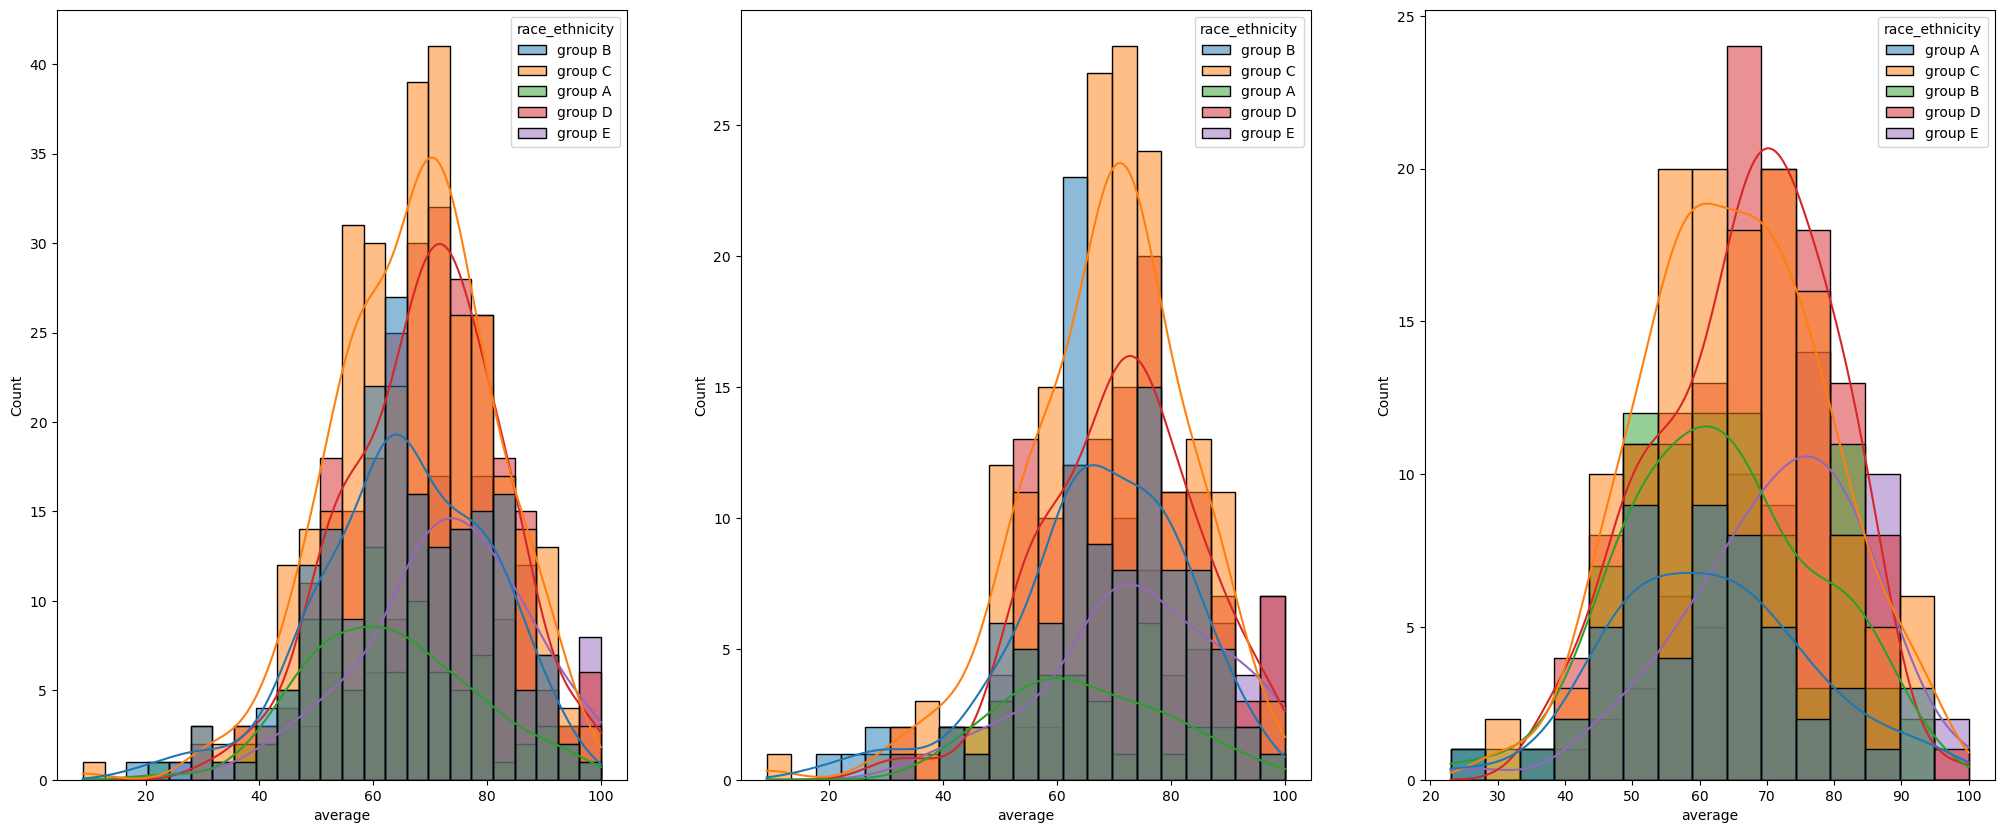

In [63]:
plt.subplots(1, 3, figsize=(25,10))
plt.subplot(131)
sns.histplot(data=data, x='average', kde=True, hue='race_ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=data[data['gender']=='female'], x='average', kde=True, hue='race_ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=data[data['gender']=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

##### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximum score of students in all three subjects

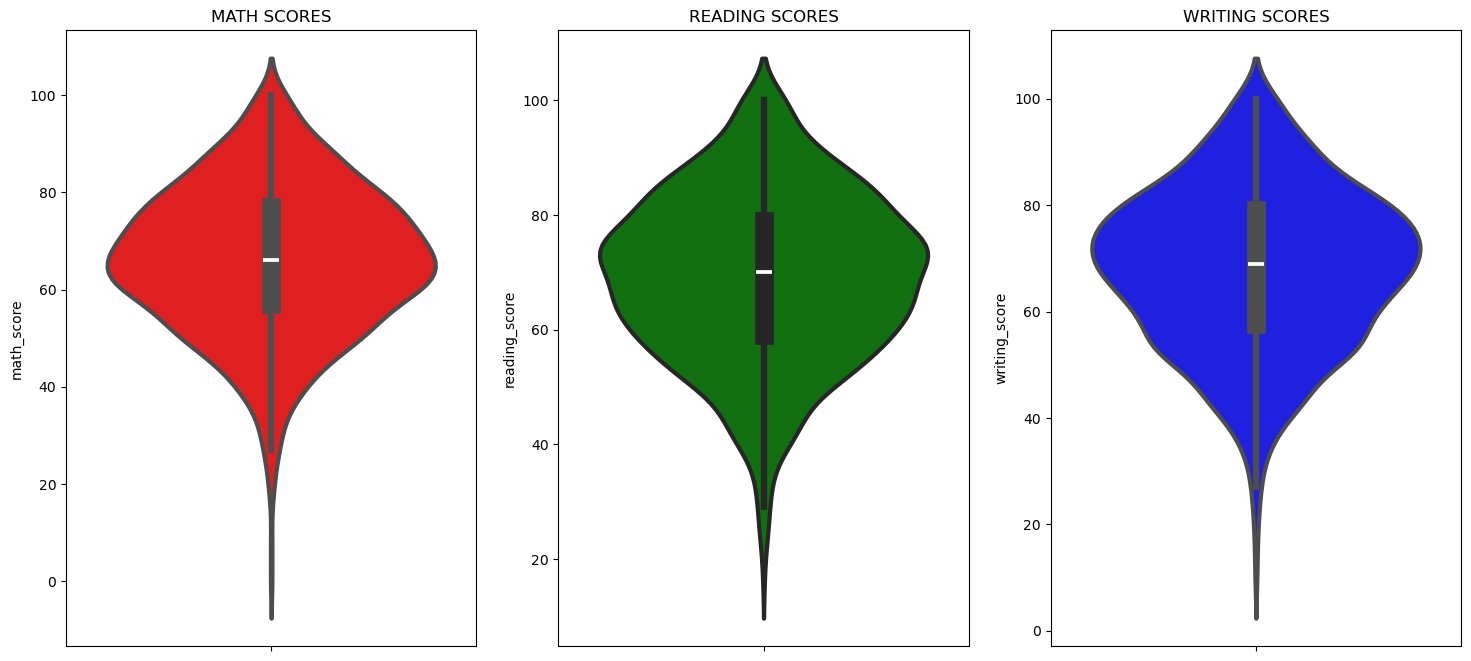

In [64]:

plt.figure(figsize=(18,8))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

##### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score 50-80

#### 4.3 Multivariate analysis using pieplot

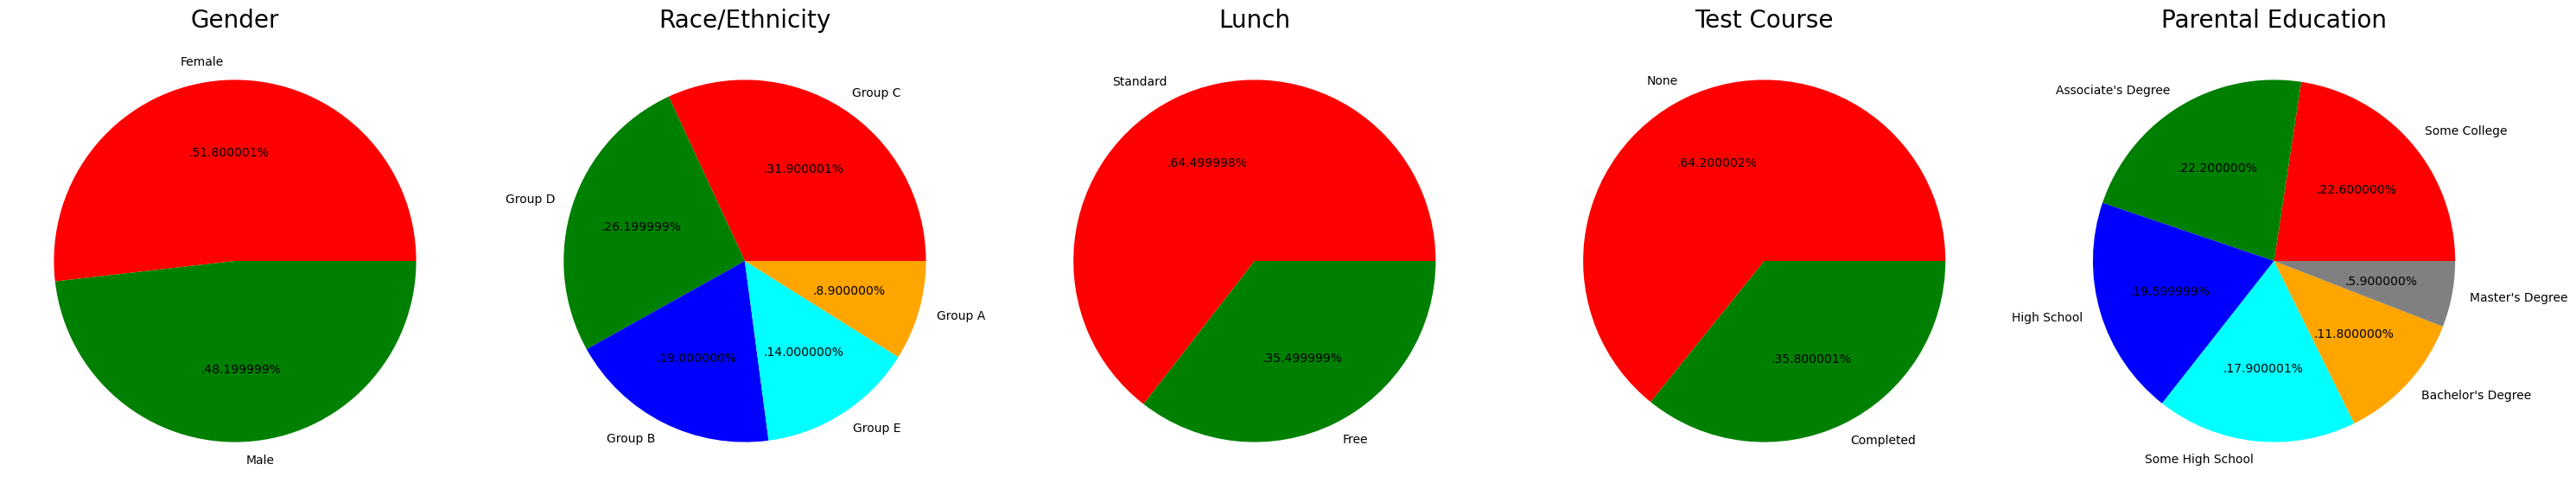

In [65]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(152)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%1f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(153)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%1f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(154)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%1f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(155)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%1f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature wise visualisation

##### 4.4.1 Gender Column

- How is the distribution of gender ?
- Is the having any imapact on student's performance ?

#### UNIVARIATE ANALYSIS (How is distributuion of gender ?)

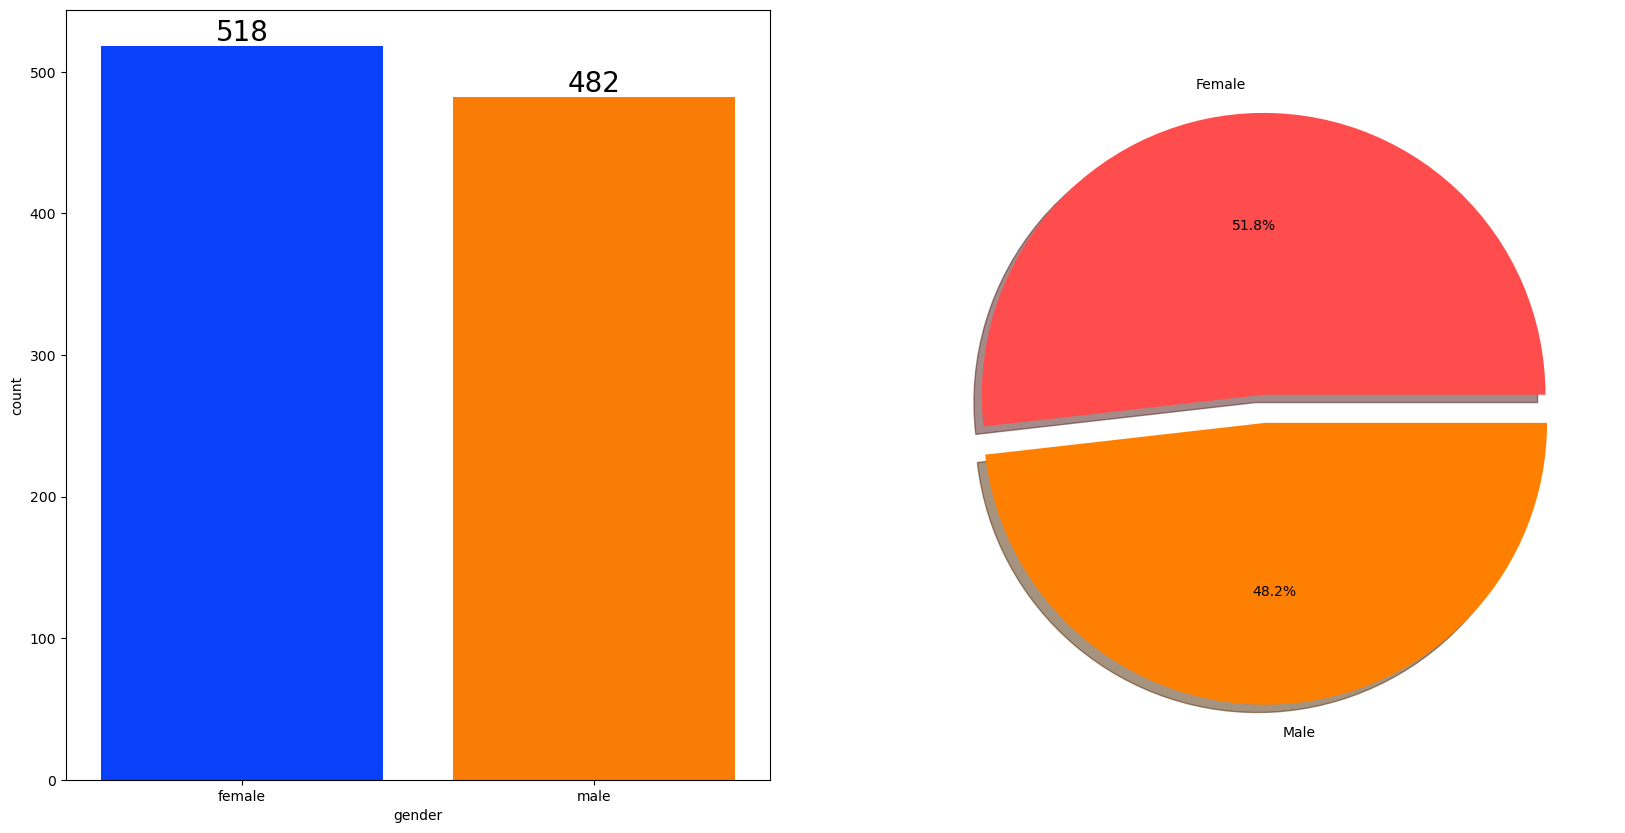

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))

plt.subplot(1, 2, 1)
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(1, 2, 2)
plt.pie(x=data['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

##### Insights

- Gender has balanced data with female students are 518(51.8%) and male students are 482(48.2%)

#### BIVARIATE ANALYSIS (Is gender having any impact on students' perfromance)

In [67]:
gender_group = data.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


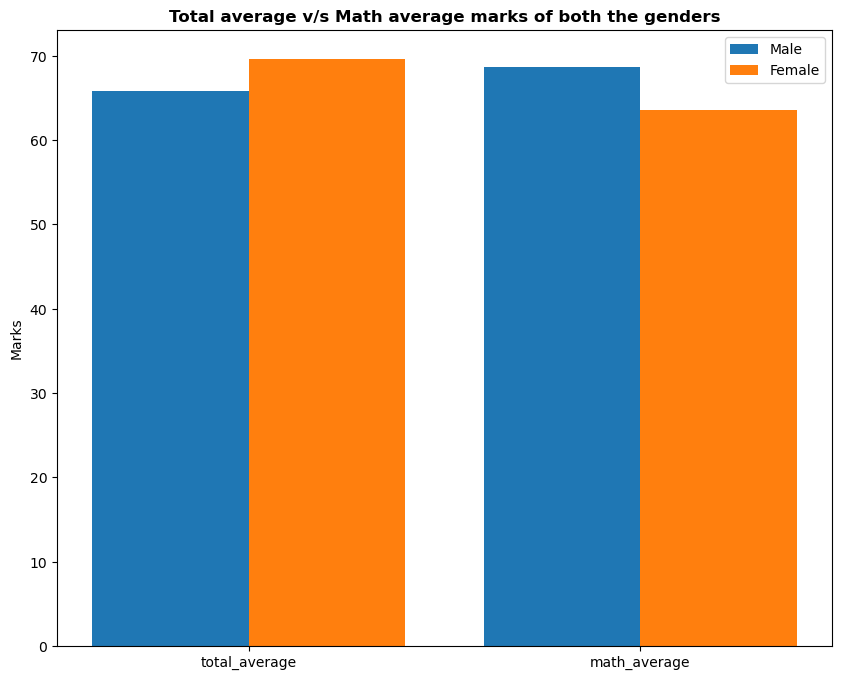

In [68]:
plt.figure(figsize=(10, 8))

X = ['total_average', 'math_average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights

- On an average females have a better overall score then males whereas males have higher score in maths than that of females

#### 4.4.2 Race/Ethnicity

- How is group wise distribution ?
- Is race/ethnicity has any impact on students' performance ?

#### UNIVARIATE ANALYSIS(How is group wise distribution ?)

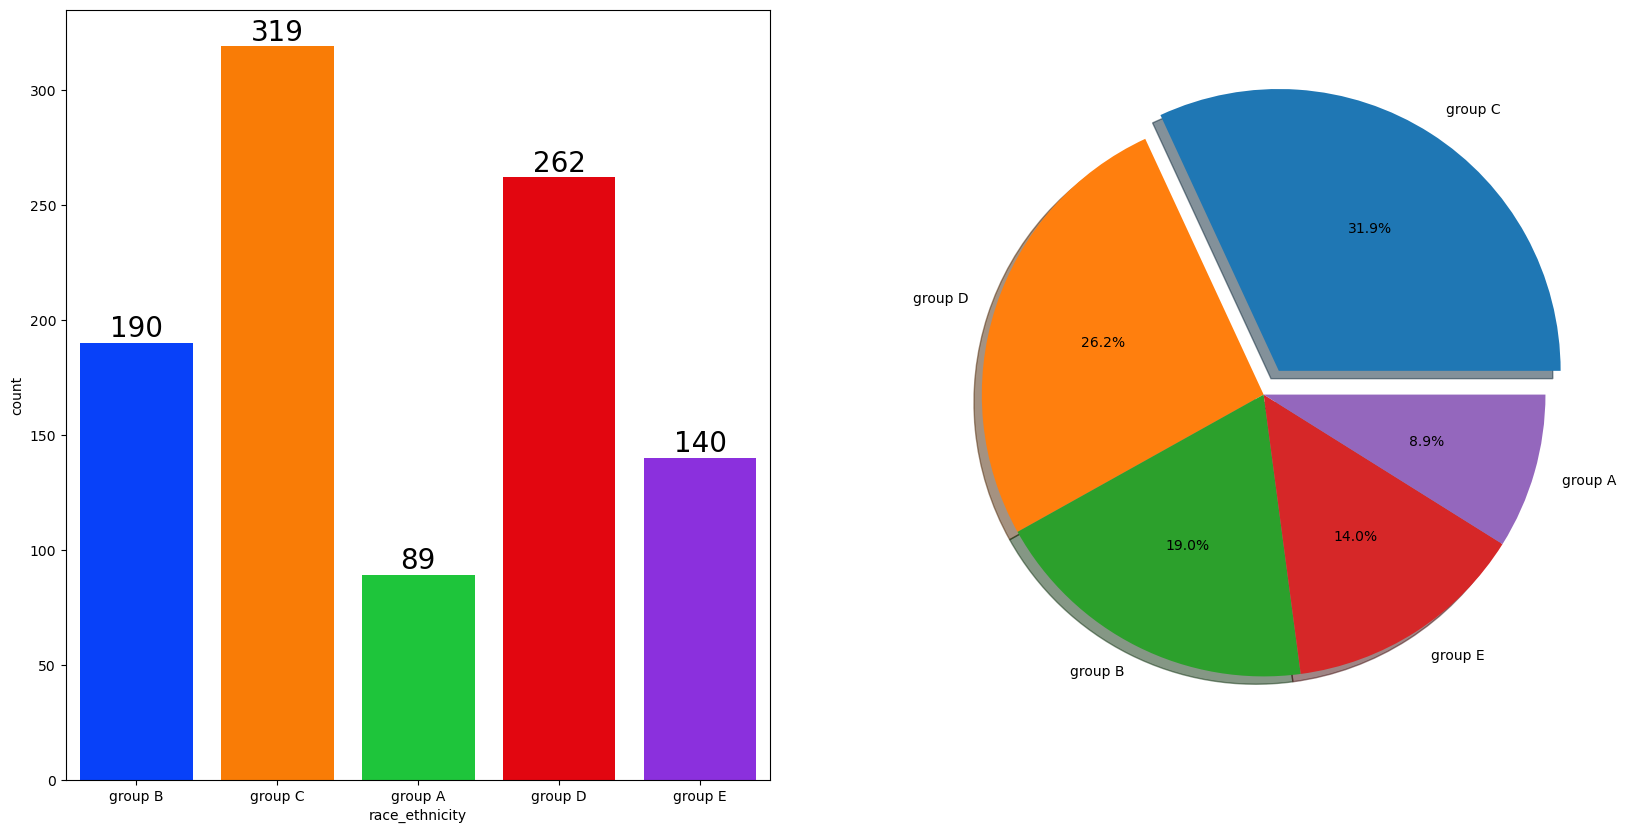

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))

plt.subplot(121)
sns.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(122)
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

##### Insights

- Most of the student belonging from group C /group D.
- Lowest number of students belong to group A.

#### BIVARIATE ANALYSIS (Is Race/Ehnicity has any impact on student's performance ?)

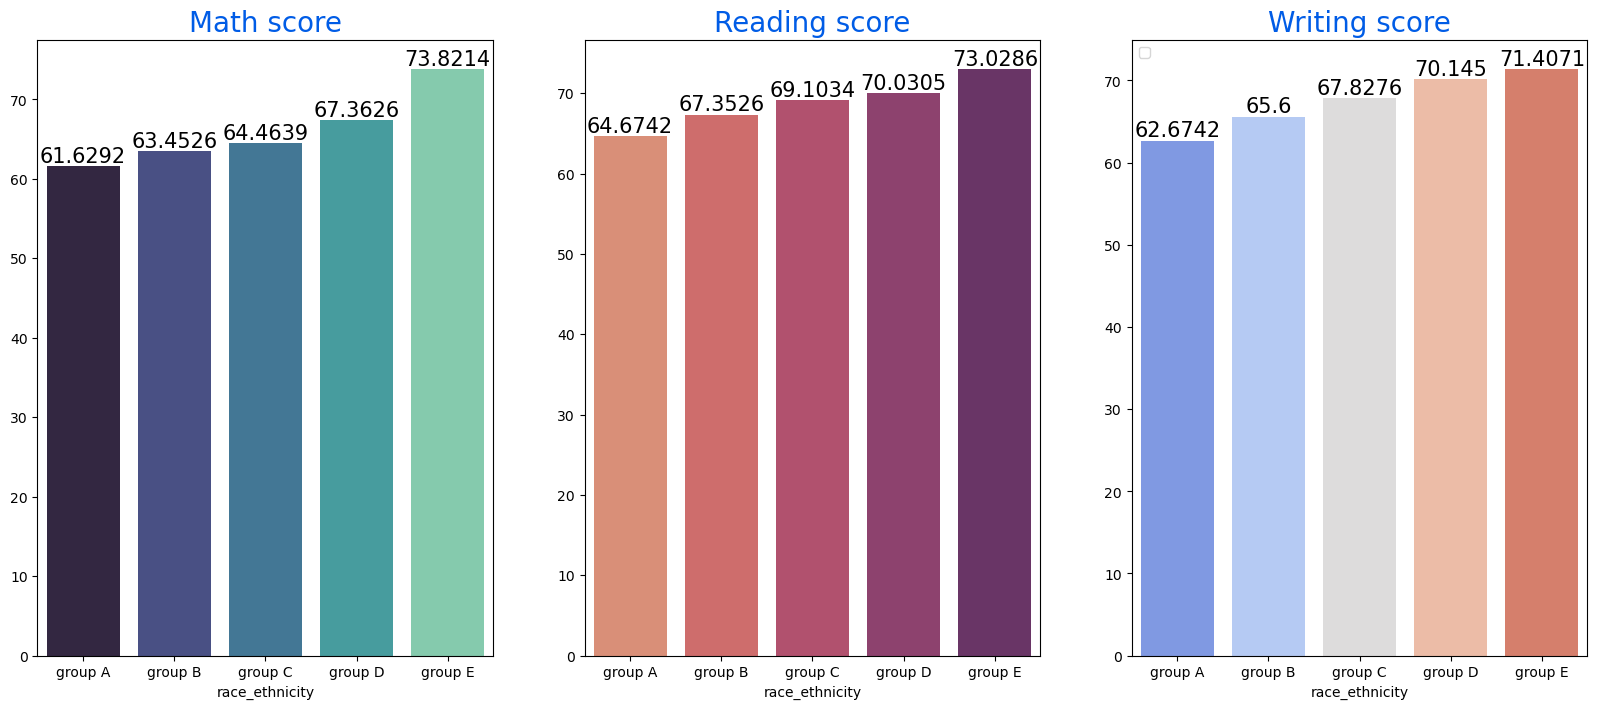

In [70]:
Group_data=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

plt.subplot(131)
sns.barplot(x=Group_data['math_score'].mean().index,y=Group_data['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

plt.subplot(132)
sns.barplot(x=Group_data['reading_score'].mean().index,y=Group_data['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

plt.subplot(133)
sns.barplot(x=Group_data['writing_score'].mean().index,y=Group_data['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

plt.legend()
plt.show()

##### Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects
  
#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS (What is educational background of student's parent ?)

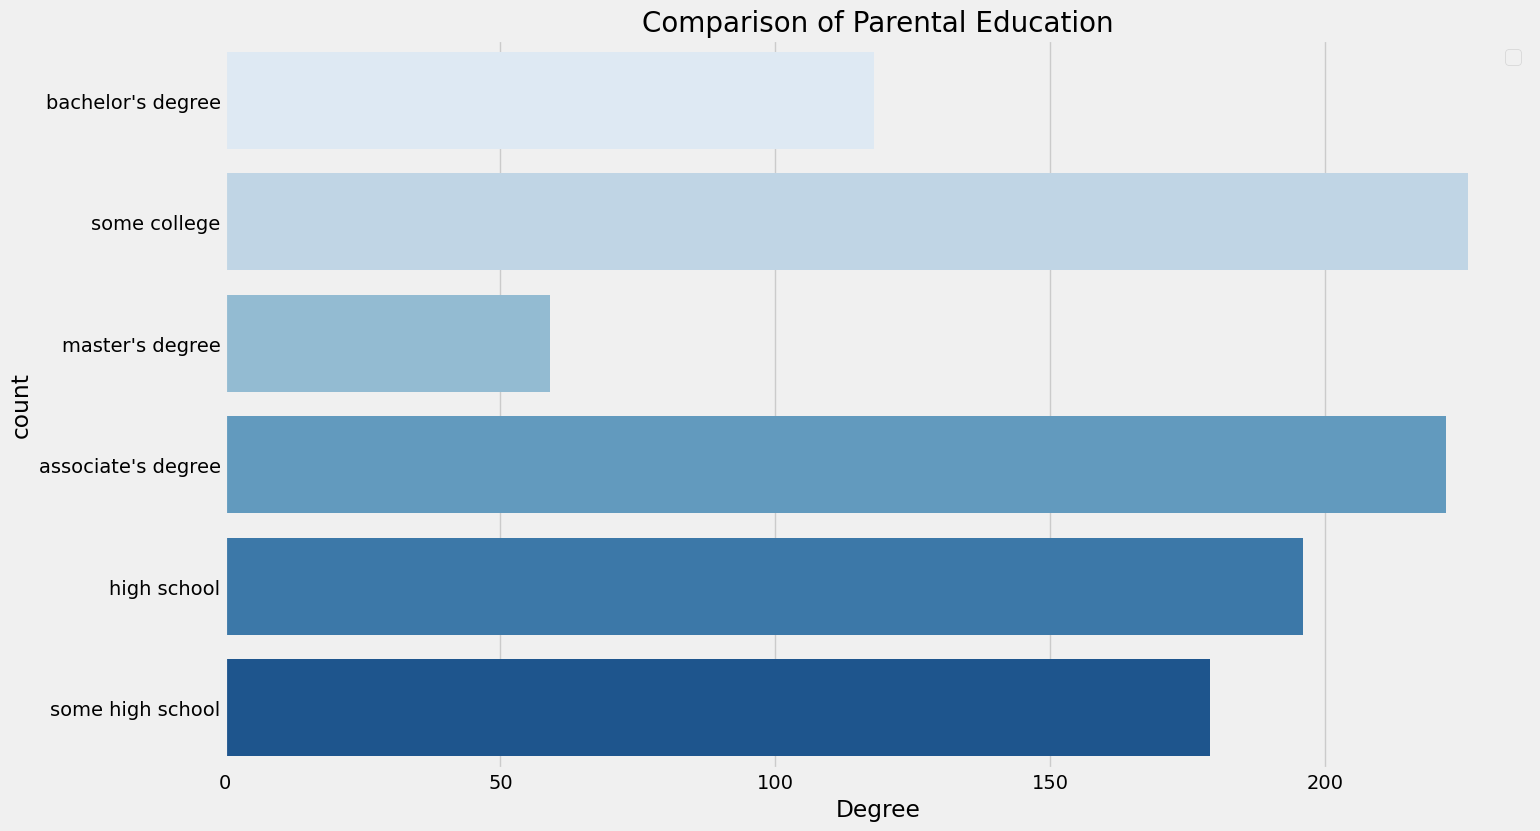

In [73]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.legend()
plt.show()

##### Insights

- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS (Is parental education has any impact on student's performance ?)

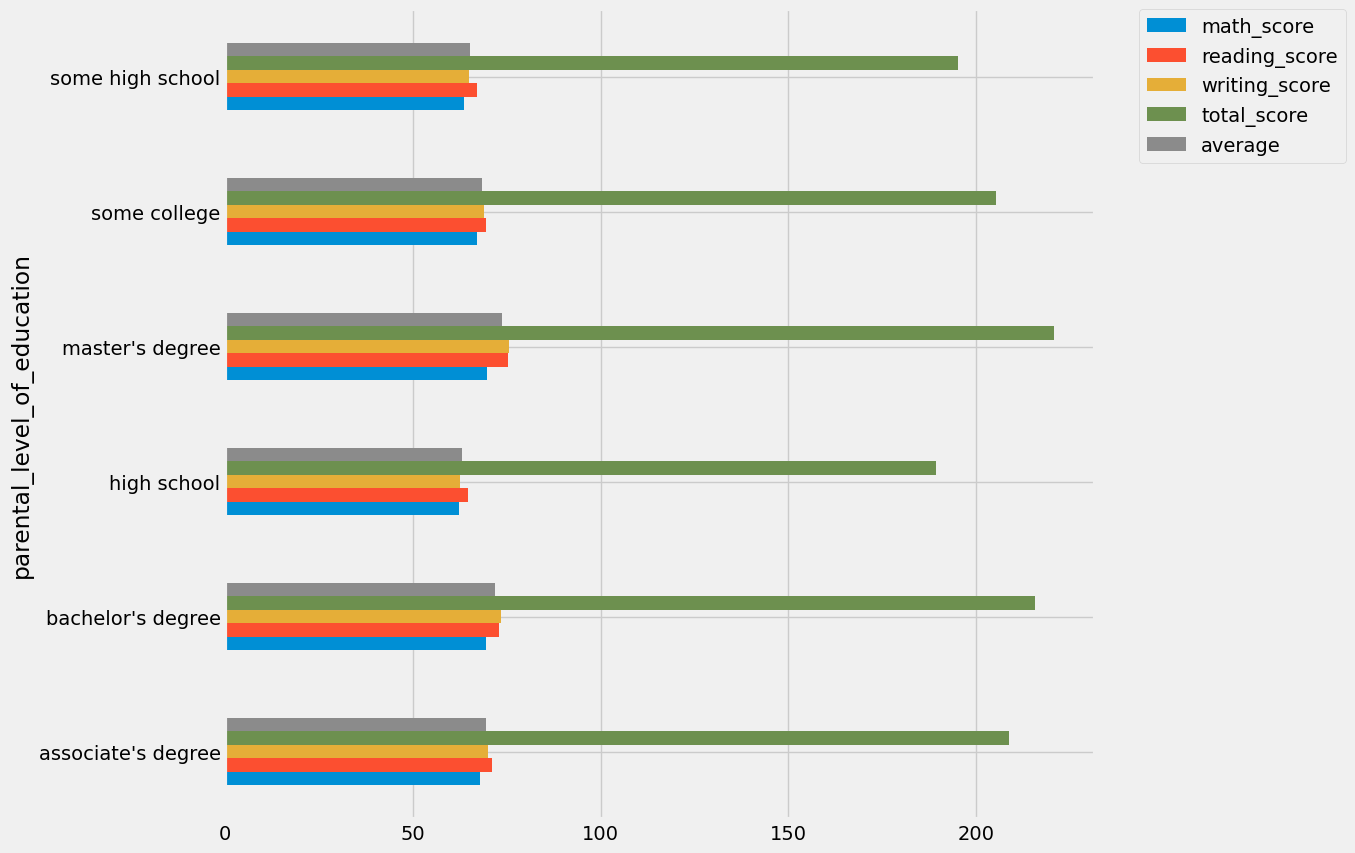

In [75]:
data.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights

- The score of student whose parents possess master and bachelor level education are higher than others

#### 4.4.4 LUNCH COLUMN

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students ?)

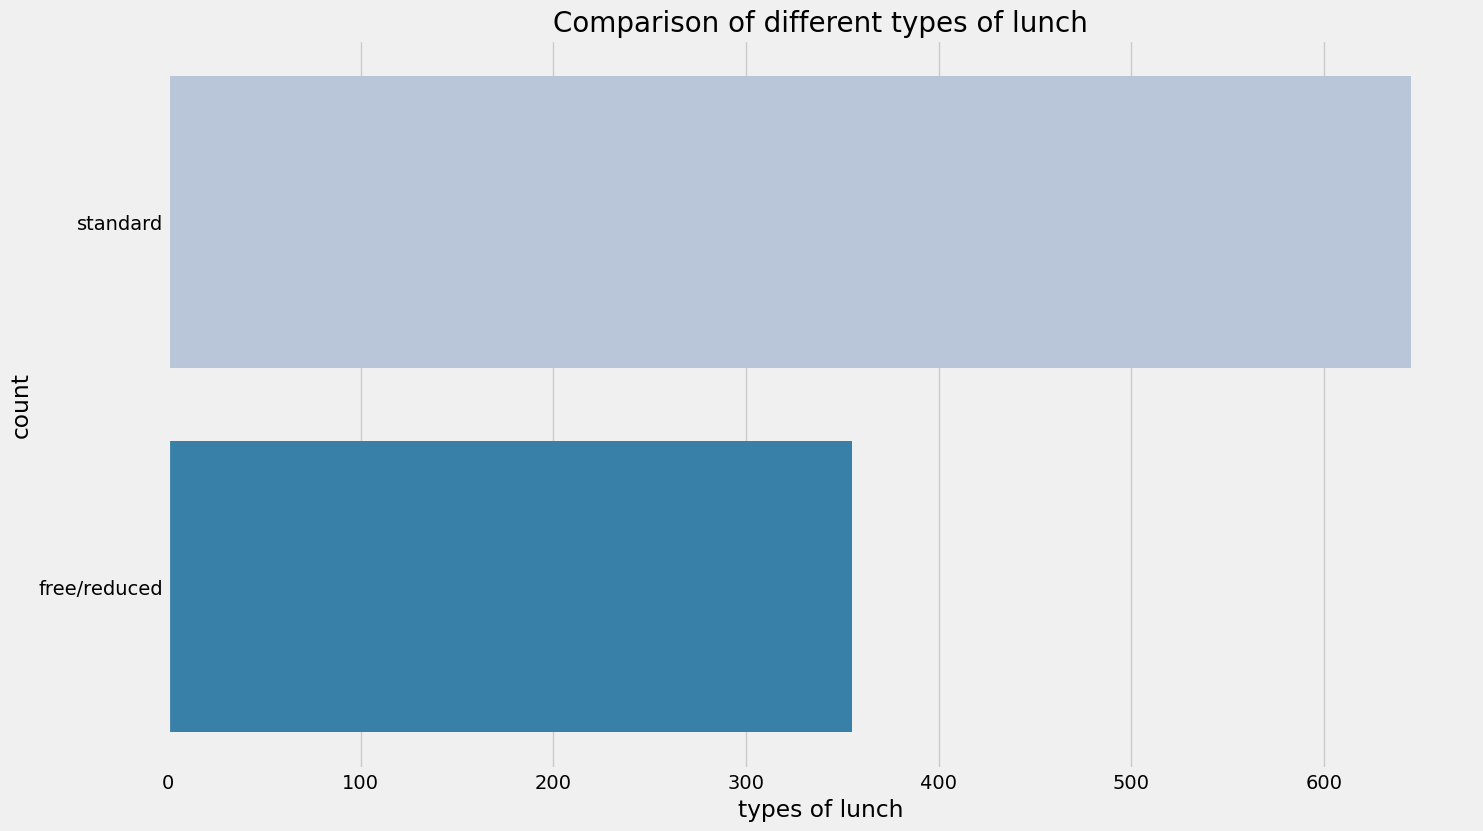

In [80]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

##### Insights

- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance ?)

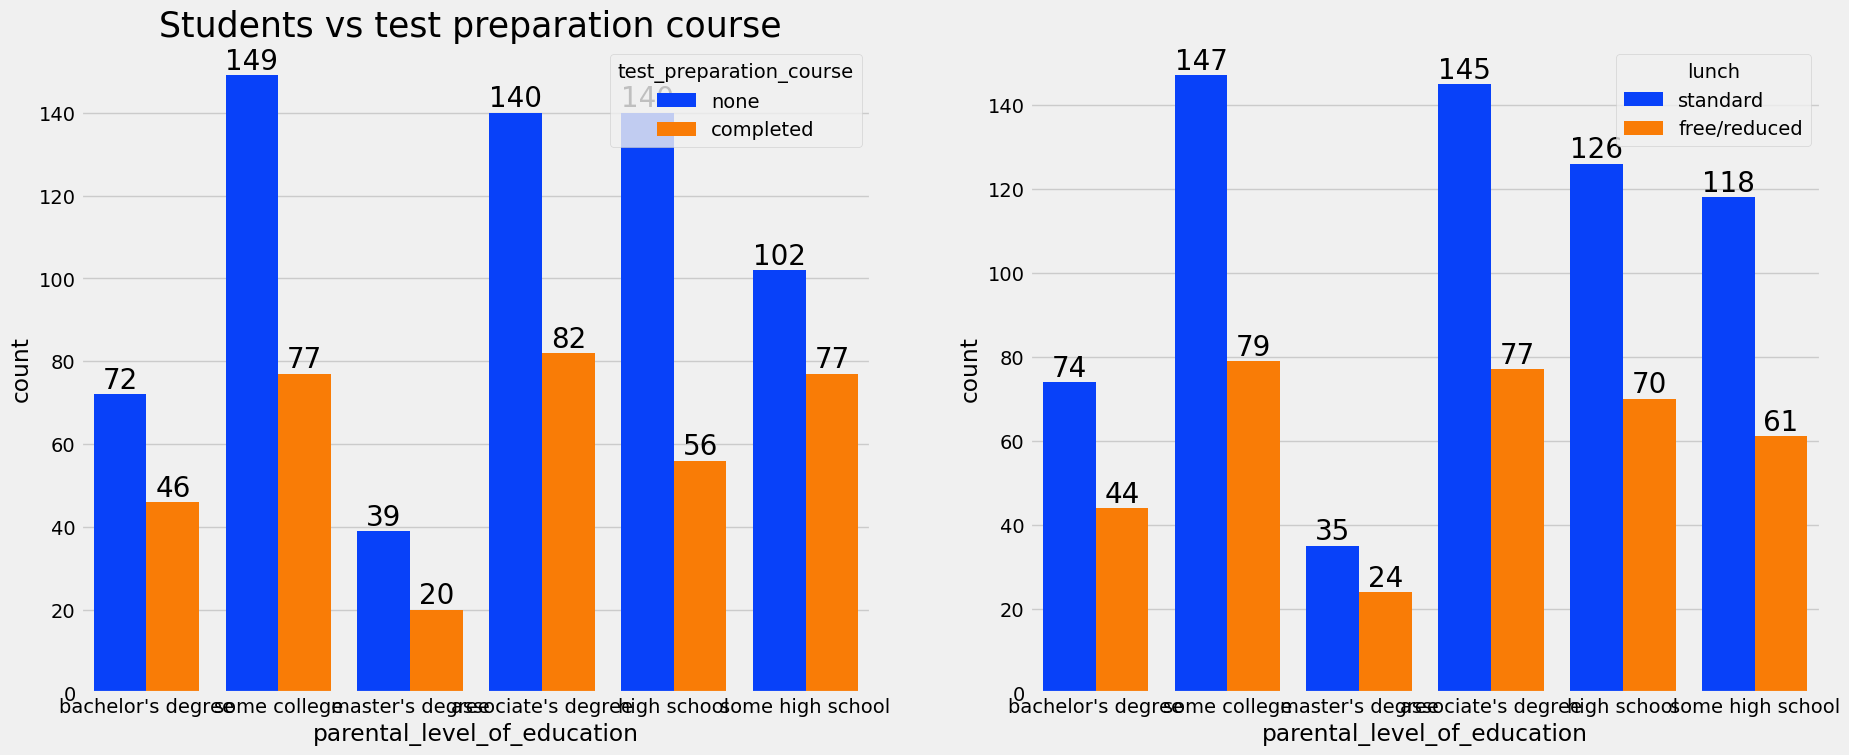

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,8))

plt.subplot(1, 2, 1)
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.subplot(1, 2, 2)
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

plt.show()

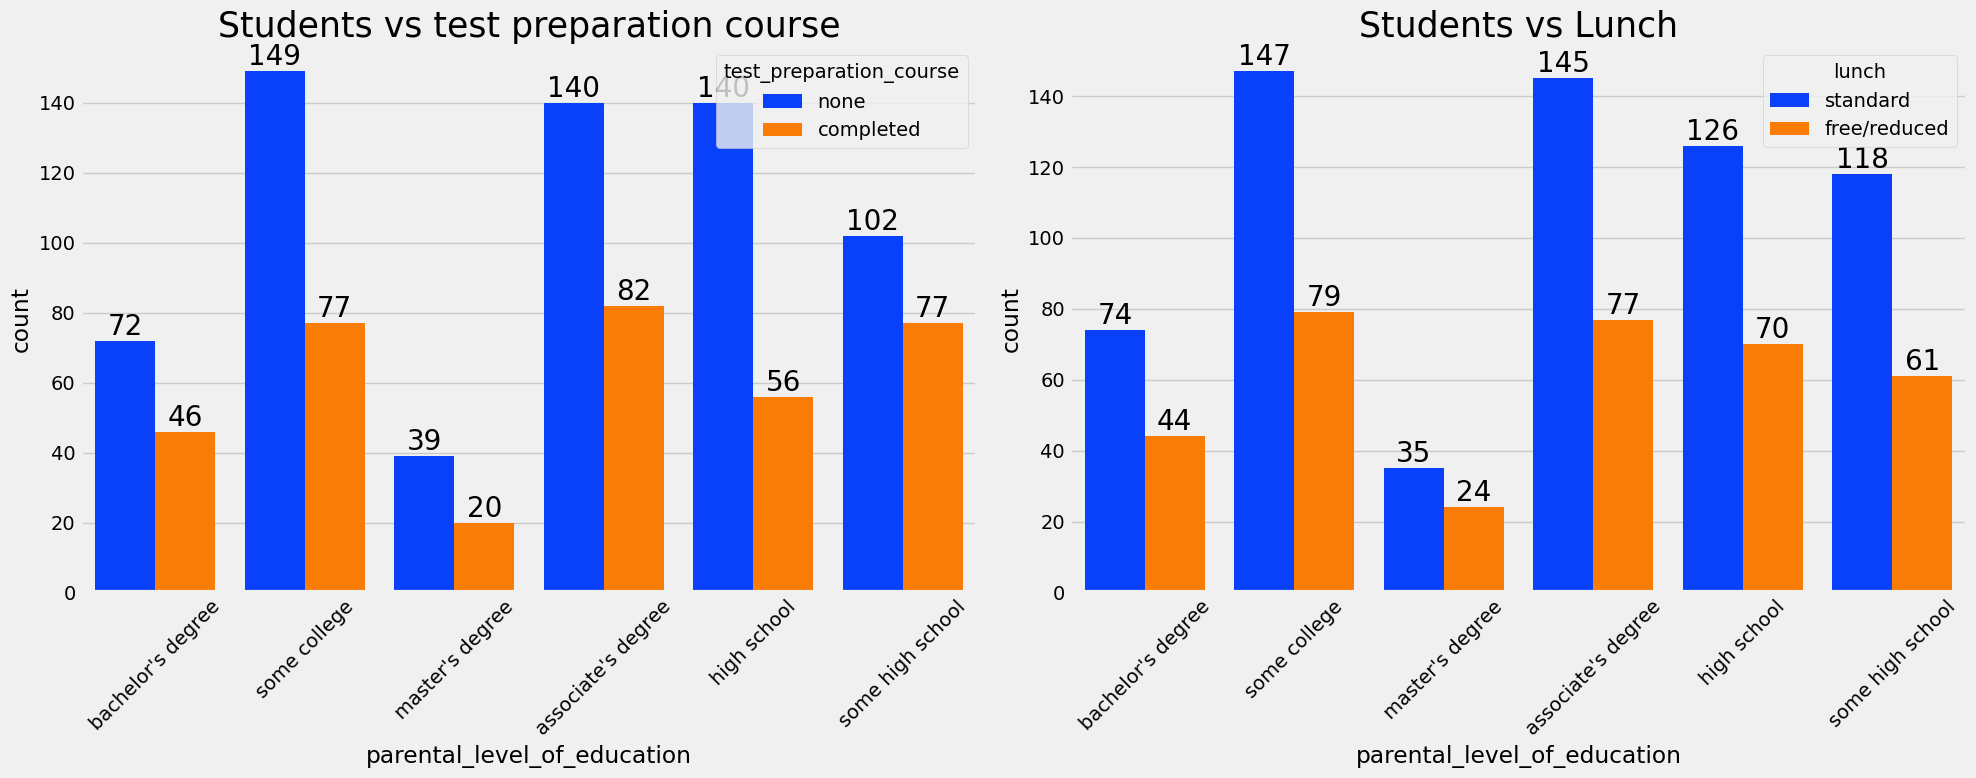

In [84]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

sns.countplot(x='parental_level_of_education', data=data, 
              palette='bright', hue='test_preparation_course', 
              saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course', color='black', size=25)
ax[0].tick_params(axis='x', rotation=45)   # 🔹 rotate x labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x='parental_level_of_education', data=data, 
              palette='bright', hue='lunch', 
              saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch', color='black', size=25)
ax[1].tick_params(axis='x', rotation=45)   # 🔹 rotate x labels
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.tight_layout()
plt.show()

##### Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN

- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

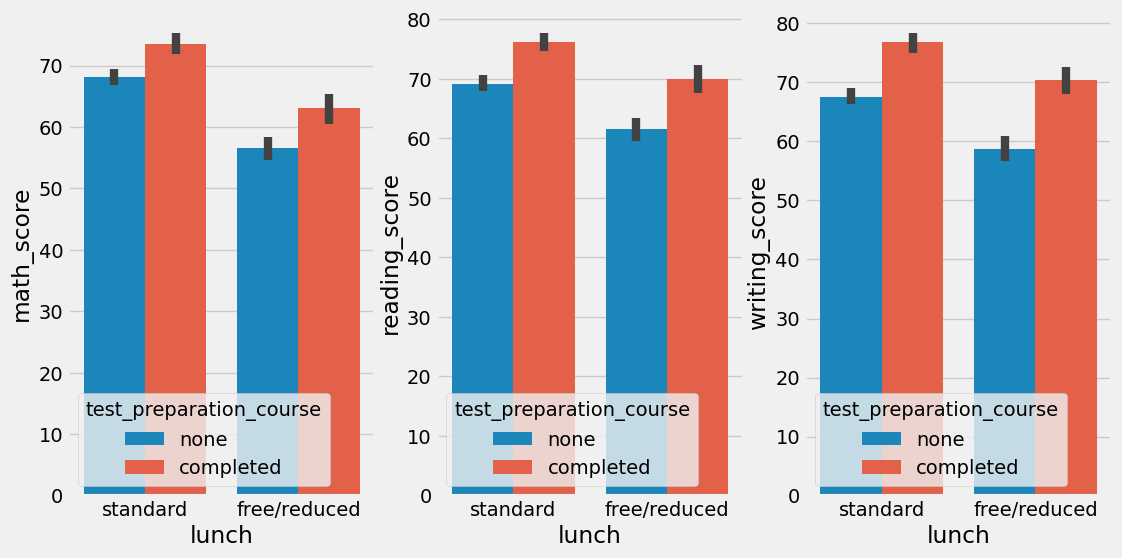

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.barplot (x=data['lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot (x=data['lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot (x=data['lunch'], y=data['writing_score'], hue=data['test_preparation_course'])
plt.show()

#|#### Insights

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

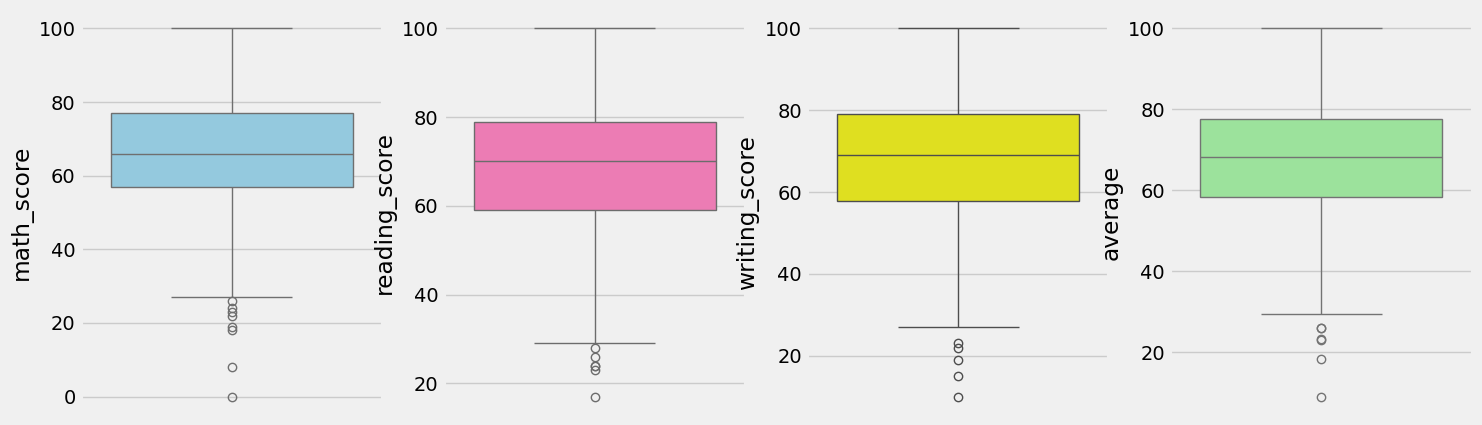

In [88]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

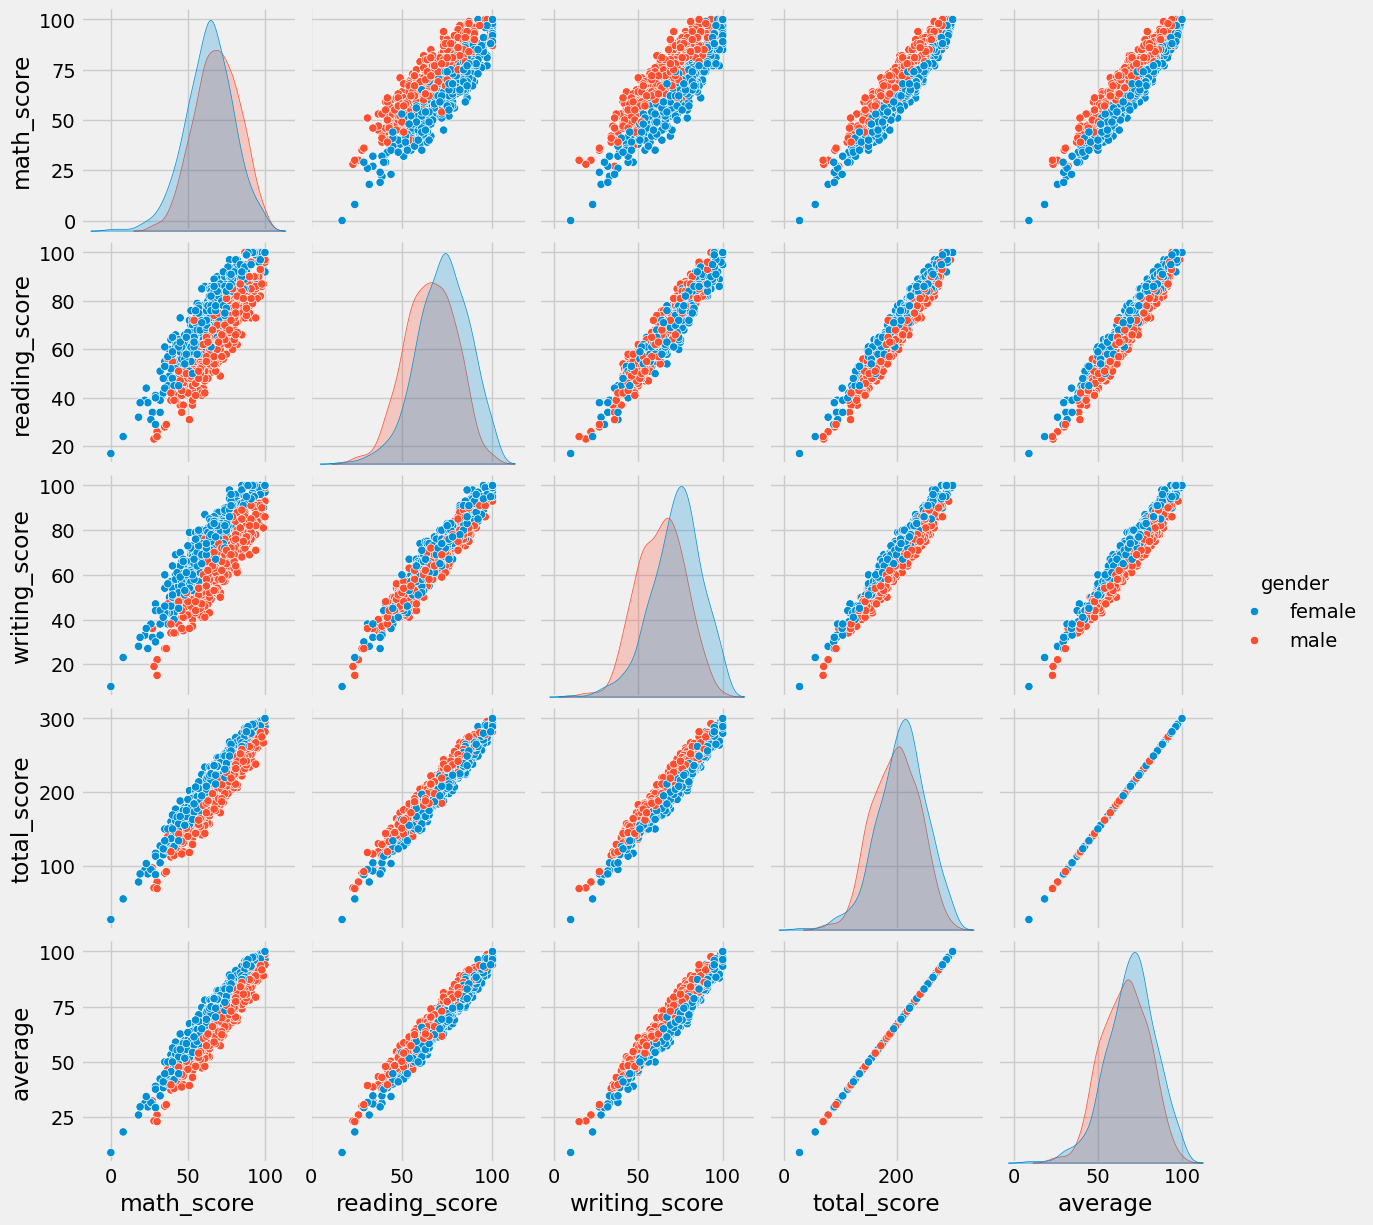

In [89]:
sns.pairplot(data,hue = 'gender')
plt.show()

##### Insights

- From the above plot it is clear that all the scores increase linearly with each other.
  
### 5) Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.